In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/analytics/main/_static/data/commerce.csv")
pd.set_option('display.max_columns', None)




Klassifiaktion: "Kauf" = Positive Klasse 
"Kein Kauf" = Negative Klasse 

In [11]:
# Als erstes schauen wir, ob die Datentypen in Ordnung sind oder ob man welche umändern/bereinigen muss
# In unserem Fall sind die Datentypen ok, da es sich nur um numerische Datentypen handelt 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [23]:
# Wir kürzen DF so, dass wir nur die Variablen haben, welche unserer Meinung nach relevant sein könnten.
df_neu = df.loc[ : , [	"Kidhome", "Income", "Teenhome" ,"Recency" ,"Age", "Response"]]

#df_neu

In [24]:
# Response ist die abhängige Variable welche untersucht wird, um zu überprüfen, welche Kunden kaufen 
# 1 = Kunden die kaufen 
# 0 = Kunden die nicht kaufen 
# Wir sehen jetzt schon, dass deutlich mehr Kunden nicht kaufen! 

df_neu['Response'].value_counts()

0    1872
1     333
Name: Response, dtype: int64

In [25]:
# Datenvorbereiten für den Algorithmus: 
# In X stehen alle unabhängigen Variablen
# in y steht die abhängige Variable
X = df_neu.drop(columns=['Response'])

y = df_neu["Response"]

In [26]:
# Train test split anwenden: 
from sklearn.model_selection import train_test_split

In [27]:
# Traintest split aus X und y 
# test_size = Testdaten 30% und Trainigsdaten = 70% 
# random_state = Zufallszahlengenerator = generiert irgendwelche Zahlen  
# aus X und y entstehen 4 verschiedene Variablen 2 Tests und 2 Training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)
X_train

,Kidhome,Income,Teenhome,Recency,Age
478,0,59432.0,1,88,58
669,0,69476.0,0,3,51
1009,0,68316.0,1,54,56
1138,0,79410.0,0,19,59
625,0,45906.0,1,20,56
...,...,...,...,...,...
960,1,46779.0,1,55,60
905,0,24401.0,0,98,41
1096,1,33569.0,0,10,37
235,0,65176.0,1,57,51


In [28]:
# Erstellung neuer Training-Datensatzes durch die Kopie des oberen Datensatzes: 
train_dataset = pd.DataFrame(X_train).copy()
train_dataset

,Kidhome,Income,Teenhome,Recency,Age
478,0,59432.0,1,88,58
669,0,69476.0,0,3,51
1009,0,68316.0,1,54,56
1138,0,79410.0,0,19,59
625,0,45906.0,1,20,56
...,...,...,...,...,...
960,1,46779.0,1,55,60
905,0,24401.0,0,98,41
1096,1,33569.0,0,10,37
235,0,65176.0,1,57,51


In [29]:
# In die Kopie fügen wir nun unsere abhängige Variable ein: 
# Trainingsdaten als Datenexplorationsobjekt: Nun könnenn wir herausfinden, welche Featurevariablen für unseren Test relevant sind und welche nicht 

train_dataset['Response'] = pd.DataFrame(y_train)
train_dataset

,Kidhome,Income,Teenhome,Recency,Age,Response
478,0,59432.0,1,88,58,0
669,0,69476.0,0,3,51,0
1009,0,68316.0,1,54,56,0
1138,0,79410.0,0,19,59,0
625,0,45906.0,1,20,56,0
...,...,...,...,...,...,...
960,1,46779.0,1,55,60,0
905,0,24401.0,0,98,41,0
1096,1,33569.0,0,10,37,1
235,0,65176.0,1,57,51,0


Exploratory data analysis (EDA)

In [55]:
# wir gruppieren nach unserer Zielvariable 
# .T transpondiert den DF -> Übersichtlicher

describetraindataset = train_dataset.groupby(by=['Response']).describe().T





Wir erkennen, dass die meisten keinen Kauf getätigt haben: Count von 0 deutlich größer ist als Count von 1 
Wir erkennen, dass die Käufer im Schnitt mehr verdienen als die Nicht-Käufer -> Es gibt systematische Unterschiede 
Wir erkennen, dass das Alter keinen Unterschied macht bei Nicht-Käufer und Käufer -> Es gibt keine systematischen Unterschiede

Wichtig bei der EDA ist es zu analysieren, ob die Auspärgungen in den Variablen 0 und 1 groß genung sind: Je höher der Unterschied der Ausprägung, desto besser kann man Vohrersagen treffen. 

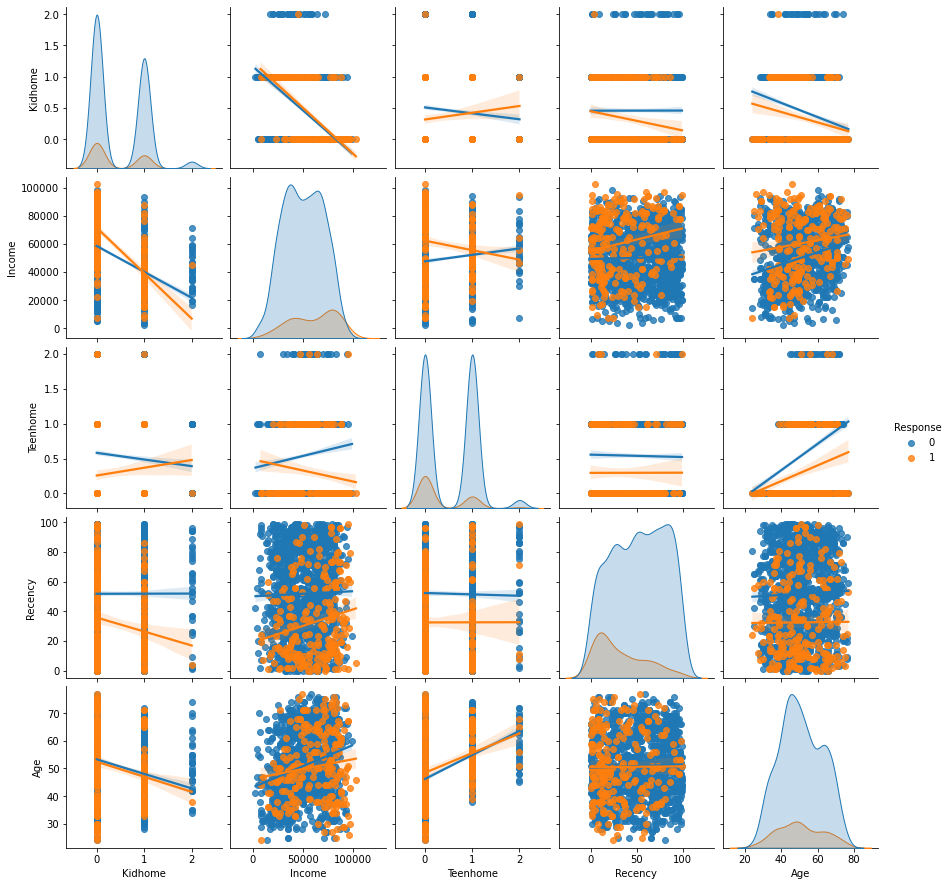

In [31]:
# Anahnd von Pairplots visualiseiren wir unsere Trainingsdaten, da diese einfacher zu interpretieren sind 
# -> Je untrerschiedlicher Orange und Blau sind desto besser sind die Varaiblen geeignet, um in ein Modell aufgenommen zu werden  

import seaborn as sns


sns.pairplot(data = train_dataset,hue= 'Response', kind= "reg", diag_kind="kde")

In [32]:
df_neu.corr().round(2)

,Kidhome,Income,Teenhome,Recency,Age,Response
Kidhome,1.00,-0.53,-0.04,0.01,-0.24,-0.08
Income,-0.53,1.00,0.04,0.01,0.21,0.17
Teenhome,-0.04,0.04,1.00,0.01,0.36,-0.16
Recency,0.01,0.01,0.01,1.00,0.01,-0.20
Age,-0.24,0.21,0.36,0.01,1.00,-0.02
Response,-0.08,0.17,-0.16,-0.20,-0.02,1.00


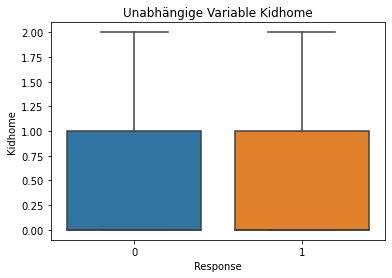

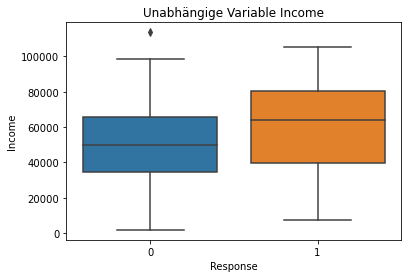

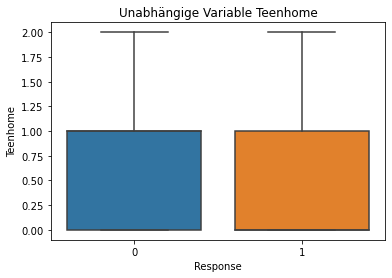

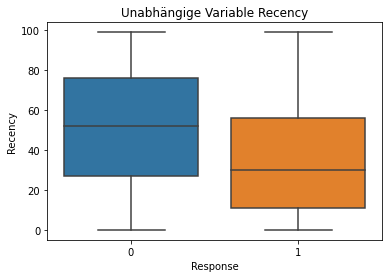

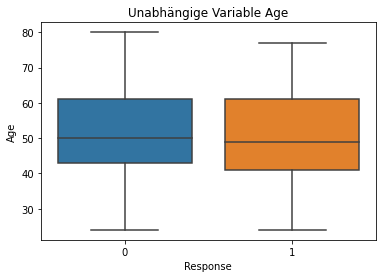

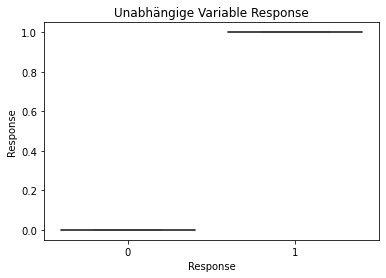

In [39]:
for i in df_neu:
    sns.boxplot(y=i, data=df_neu,  x="Response")
    plt.title("Unabhängige Variable " + i)
    plt.show()

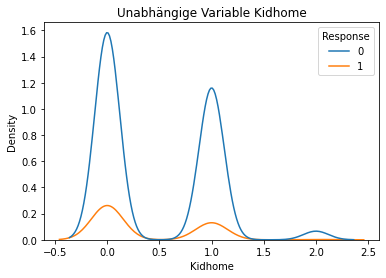

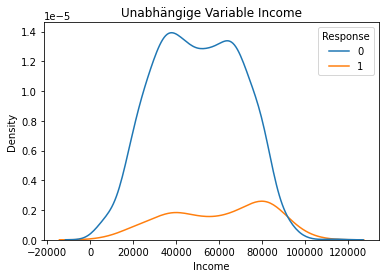

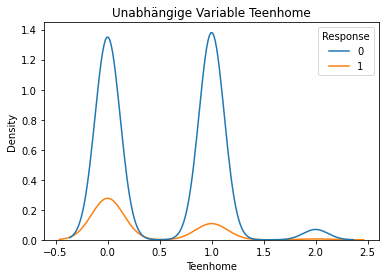

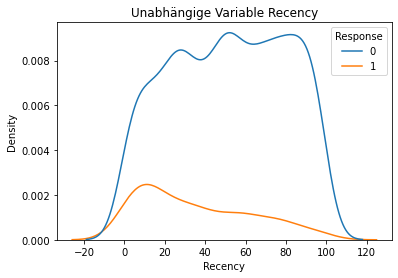

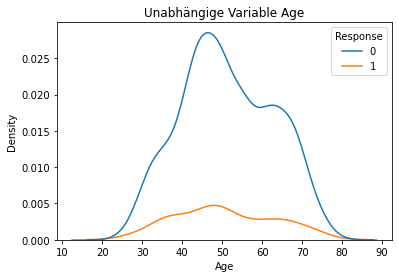

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


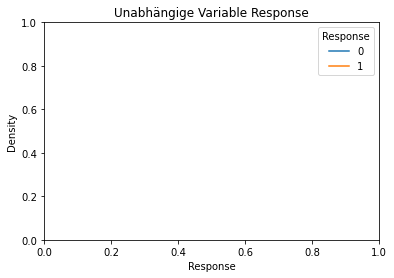

In [54]:
for i in df_neu:
    sns.kdeplot(x=i, data=df_neu,  hue="Response")
    plt.title("Unabhängige Variable " + i)
    plt.show()

Regressionsmodell: 

In [40]:
# Liste mit den unabhängigen Variralben welche ich in mein Modell aufnehme
features_model = ['Recency', 'Income', 'Age']

In [41]:
# Eingrenzung des Featuremodells in einem neuen Trainingsmodell
X_train =  X_train[features_model]
X_test = X_test[features_model]

In [42]:
# Regressionsmodell mit LogisticRegression  
from sklearn.linear_model import LogisticRegression

#Erzeugung des Modells
clf = LogisticRegression()

In [43]:
# Anwednunge des Modells auf die Trainingsdaten 

clf.fit (X_train, y_train)

LogisticRegression()

In [44]:
# Vorhersage

y_pred = clf.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [45]:
# Genauigkeit des Modells = Accuracy 
clf.score(X_test, y_test)

0.8580060422960725

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

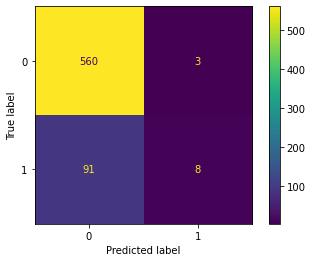

In [47]:
ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test)

In [48]:
from sklearn.metrics import classification_report

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       563
           1       0.73      0.08      0.15        99

    accuracy                           0.86       662
   macro avg       0.79      0.54      0.53       662
weighted avg       0.84      0.86      0.81       662



Modell liefert uns sehr genaue Ergebnisse! -> Wir haben ein ideales System  

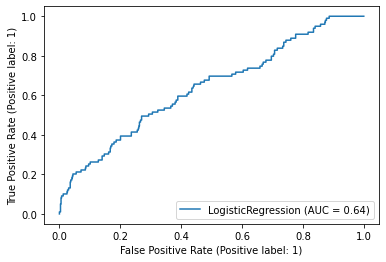

In [49]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, X_test, y_test) 

In [50]:
from sklearn.metrics import roc_auc_score

y_score = clf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_score)

0.6370723217970109

Regression: 
Wir schauen, ob es Zusammenhänge zwischen den Variablen MNTWines und Response

In [ ]:
# Data Split: 



# Wir schauen uns in der Punktewolke an, ob die abhänige Variralbe (=MntWines) und unabhängige Variable (=Response) einen Zusammenhang haben 



%matplotlib inline
import seaborn as sns

# Visualize the data
sns.relplot(x="gdp_per_capita", y='life_satisfaction', hue='country', data=df);

In [47]:
df2 = df.loc[ : , ["Response", "MntWines" ]]